In [1]:
import sklearn.tree
import pandas
import numpy
import seaborn
import matplotlib.pyplot
%matplotlib inline

 # Importing and Cleaning Rent data 

In [2]:


rent = pandas.read_csv('/Users/nerenevaz/Downloads/FA13-2016-17.csv')
rent.dropna(inplace=True)
rent['DateLodgement'] = pandas.to_datetime(rent.DateLodgement,format='%m/%d/%Y')
rent['DateTenancyCommenced'] = pandas.to_datetime(rent.DateTenancyCommenced,format='%m/%d/%Y')
rent['BondAmount'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
rent['PremisesWeeklyRent'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
rent['BondAmount'] = rent['BondAmount'].convert_objects(convert_numeric=True)
rent['PremisesWeeklyRent'] = rent['PremisesWeeklyRent'].convert_objects(convert_numeric=True)
rent['DateLodgement'] = rent['DateLodgement'].apply(lambda x: x.strftime('%Y'))    
rent['DateTenancyCommenced'] = rent['DateTenancyCommenced'].apply(lambda x: x.strftime('%Y'))
rent['Premises_Postcode'] = rent['Premises_Postcode'].convert_objects(convert_numeric=True)
result = rent.groupby(['DateLodgement','Premises_Postcode','Premises_Suburb'], as_index=False).agg(
                      {'PremisesWeeklyRent':['mean']})
rent_mean = result.reset_index(drop=True)
rent_mean = rent_mean[(rent_mean['Premises_Postcode'] >= 2000) & (rent_mean['Premises_Postcode'] <= 2250)]
rent_mean.Premises_Postcode = rent_mean.Premises_Postcode.round()
rent_mean.PremisesWeeklyRent = rent_mean.PremisesWeeklyRent.round()
rent_mean.head(5)

/Users/nerenevaz/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/Users/nerenevaz/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/Users/nerenevaz/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


DateLodgement Premises_Postcode    Premises_Suburb PremisesWeeklyRent
                                                                   mean
1          2013            2000.0        DAWES POINT             1400.0
2          2013            2000.0          HAYMARKET              515.0
3          2013            2000.0      KING ST WHARF              800.0
4          2013            2000.0  KING STREET WHARF             1300.0
5          2013            2000.0      MILLERS POINT              631.0

In [3]:
# Creating a Weekly mean rent by year from the Rent data

Weekly_Mean_Rent = rent_mean[['Premises_Postcode','DateLodgement','PremisesWeeklyRent']]
Weekly_Mean_Rent.columns = Weekly_Mean_Rent.columns.swaplevel(0, 1)
Weekly_Mean_Rent.sortlevel(1, axis=1, inplace=True)
Weekly_Mean_Rent.columns = Weekly_Mean_Rent.columns.droplevel(-1)
Weekly_Mean_Rent.columns = ['PremisesWeeklyRent','Premises_Postcode','DateLodgement']
Weekly_Mean_Rent
results = Weekly_Mean_Rent.groupby(['DateLodgement','Premises_Postcode'], as_index=False).agg(
                      {'PremisesWeeklyRent':['mean']})
results.columns = results.columns.swaplevel(0, 1)
results.sortlevel(1, axis=1, inplace=True)
results.columns = results.columns.droplevel(-1)
results.columns = ['PremisesWeeklyRent','Premises_Postcode','DateLodgement']
Weekly_Mean_Rent = results
Weekly_Mean_Rent = Weekly_Mean_Rent.pivot(index='Premises_Postcode', columns='DateLodgement', values='PremisesWeeklyRent')
Weekly_Mean_Rent.head(10)

/Users/nerenevaz/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:3312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  inplace=inplace, sort_remaining=sort_remaining)


DateLodgement            2013        2014         2015         2016
Premises_Postcode                                                  
2000.0             986.125000  944.428571  1231.250000  1228.857143
2007.0             640.500000  623.000000   518.000000   414.000000
2008.0             625.000000  659.666667   436.333333   505.000000
2009.0             751.500000  726.000000   726.000000   744.000000
2010.0             614.000000  621.333333   615.666667   641.000000
2011.0             568.000000  574.833333   622.833333   626.166667
2012.0             630.000000         NaN   670.000000          NaN
2015.0             566.666667  729.000000   571.333333   553.000000
2016.0             451.666667  569.000000   479.333333   491.000000
2017.0             721.666667  720.333333   655.500000   662.000000

# Importing Crime Statistics

In [4]:


police_stats = pandas.read_csv('/Users/nerenevaz/Downloads/PostcodeData2015.csv',index_col='Postcode')

# Cleaning the Crime data

In [5]:


Offences = police_stats[['Offence category','Jan 2013',
 'Feb 2013',
 'Mar 2013',
 'Apr 2013',
 'May 2013',
 'Jun 2013',
 'Jul 2013',
 'Aug 2013',
 'Sep 2013',
 'Oct 2013',
 'Nov 2013',
 'Dec 2013',
 'Jan 2014',
 'Feb 2014',
 'Mar 2014',
 'Apr 2014',
 'May 2014',
 'Jun 2014',
 'Jul 2014',
 'Aug 2014',
 'Sep 2014',
 'Oct 2014',
 'Nov 2014',
 'Dec 2014',
 'Jan 2015',
 'Feb 2015',
 'Mar 2015',
 'Apr 2015',
 'May 2015',
 'Jun 2015',
 'Jul 2015',
 'Aug 2015',
 'Sep 2015',
 'Oct 2015',
 'Nov 2015',
 'Dec 2015']]
Offences_2013 = Offences.filter(like = '2013')
Offences_2013['2013'] = Offences_2013.sum(axis=1)
Offences_2013 = Offences_2013[['2013']]
Offences_2014 = Offences.filter(like = '2014')
Offences_2014['2014'] = Offences_2014.sum(axis=1)
Offences_2014 = Offences_2014[['2014']]
Offences_2015 = Offences.filter(like = '2015')
Offences_2015['2015'] = Offences_2015.sum(axis=1)
Offences_2015 = Offences_2015[['2015']]
Offences1 = Offences[['Offence category']]
Offences1.reset_index()
Offences = pandas.concat([Offences1, Offences_2013, Offences_2014,Offences_2015], axis=1, join_axes=[Offences1.index])
Offences.reset_index()
Offence = Offences.reset_index(drop=False)
Crime = Offence.groupby(['Postcode', 'Offence category'], as_index=False).sum()
Crime = Crime[(Crime['Postcode'] >= 2000) & (Crime['Postcode'] <= 2250)]
Crime.head(5)

Postcode             Offence category  2013  2014  2015
0      2000     Abduction and kidnapping     3     5     0
1      2000   Against justice procedures   900   760   727
2      2000                        Arson    10     4     8
3      2000                      Assault  1778  1603  1720
4      2000  Betting and gaming offences     0     2     0

In [6]:
Crime = Crime.pivot(index='Postcode', columns='Offence category')
Crime.head(5)

2013                                   \
Offence category Abduction and kidnapping Against justice procedures Arson   
Postcode                                                                     
2000                                  3.0                      900.0  10.0   
2006                                  0.0                       17.0   0.0   
2007                                  0.0                       11.0   5.0   
2008                                  0.0                       17.0   5.0   
2009                                  0.0                       25.0   0.0   

                                                                              \
Offence category Assault Betting and gaming offences Blackmail and extortion   
Postcode                                                                       
2000              1778.0                         0.0                     3.0   
2006                29.0                         NaN                     1.0   
2007                67.0                         0.0                     0.0   
2008                89.0                         0.0                     1.0   
2009               162.0                        16.0                     0.0   

                                                   \
Offence category Disorderly conduct Drug offences   
Postcode                                            
2000                          975.0        1841.0   
2006                           10.0          21.0   
2007                           22.0          53.0   
2008                           33.0          52.0   
2009                           32.0         200.0   

                                                                         \
Offence category Harassment, threatening behaviour and private nuisance   
Postcode                                                                  
2000                                                          296.0       
2006                                                            9.0       
2007                                                           18.0       
2008                                                           16.0       
2009                                                           35.0       

                                       ...               \
Offence category Homicide              ...                
Postcode                               ...                
2000                  2.0              ...                
2006                  0.0              ...                
2007                  0.0              ...                
2008                  0.0              ...                
2009                  0.0              ...                

                                         2015                 \
Offence category Malicious damage to property Other offences   
Postcode                                                       
2000                                    647.0          704.0   
2006                                     28.0            4.0   
2007                                     47.0           22.0   
2008                                     79.0           10.0   
2009                                     87.0           88.0   

                                                                         \
Offence category Other offences against the person Pornography offences   
Postcode                                                                  
2000                                          17.0                  4.0   
2006                                           1.0                  0.0   
2007                                           1.0                  0.0   
2008                                           0.0                  0.0   
2009                                           3.0                  0.0   

                                                            \
Offence category Prohibited and regulated weapons offences   
Postcode                          

In [7]:
Rent_Crime = pandas.concat([Crime, Weekly_Mean_Rent], axis=1, join_axes=[Crime.index])
Rent_Crime.reset_index(inplace=True)

In [8]:
Rent_Crime.drop('2016', 1,inplace=True)
Rent_Crime.fillna(Rent_Crime.mean(),inplace=True)
Rent_Crime.head(5)

Postcode  (2013, Abduction and kidnapping)  \
0      2000                               3.0   
1      2006                               0.0   
2      2007                               0.0   
3      2008                               0.0   
4      2009                               0.0   

   (2013, Against justice procedures)  (2013, Arson)  (2013, Assault)  \
0                               900.0           10.0           1778.0   
1                                17.0            0.0             29.0   
2                                11.0            5.0             67.0   
3                                17.0            5.0             89.0   
4                                25.0            0.0            162.0   

   (2013, Betting and gaming offences)  (2013, Blackmail and extortion)  \
0                             0.000000                              3.0   
1                             0.289474                              1.0   
2                             0.000000                              0.0   
3                             0.000000                              1.0   
4                            16.000000                              0.0   

   (2013, Disorderly conduct)  (2013, Drug offences)  \
0                       975.0                 1841.0   
1                        10.0                   21.0   
2                        22.0                   53.0   
3                        33.0                   52.0   
4                        32.0                  200.0   

   (2013, Harassment, threatening behaviour and private nuisance)  \
0                                              296.0                
1                                                9.0                
2                                               18.0                
3                                               16.0                
4                                               35.0                

      ...       (2015, Pornography offences)  \
0     ...                                4.0   
1     ...                                0.0   
2     ...                                0.0   
3     ...                                0.0   
4     ...                                0.0   

   (2015, Prohibited and regulated weapons offences)  \
0                                              212.0   
1                                               10.0   
2                                               12.0   
3                                               10.0   
4                                               19.0   

   (2015, Prostitution offences)  (2015, Robbery)  (2015, Sexual offences)  \
0                       0.000000            107.0                    195.0   
1                       1.168317              4.0                      8.0   
2                       1.168317             16.0                     22.0   
3                       0.000000             12.0                     19.0   
4                       0.000000             10.0                     17.0   

   (2015, Theft)  (2015, Transport regulatory offences)        2013  \
0         7856.0                                 6310.0  986.125000   
1          232.0                                    5.0  828.266107   
2          742.0                                   17.0  640.500000   
3          477.0                                    4.0  625.000000   
4          849.0                                    9.0  751.500000   

         2014         2015  
0  944.428571  1231.250000  
1  611.506082   713.847004  
2  623.000000   518.000000  
3  659.666667   436.333333  
4  726.000000   726.000000  

[5 rows x 67 columns]

# Exporting file to clean column headers in excel and then reimporting it 

In [9]:
Rent_Crime.to_csv('/Users/nerenevaz/Downloads/Rent_Crime.csv')
Rent_vs_Crime = pandas.read_csv('/Users/nerenevaz/Downloads/Rent_Crime_clean.csv')

In [10]:
Rent_vs_Crime = Rent_vs_Crime.round()
Rent_vs_Crime

Postcode  Crime_2013_Abduction_and_kidnapping  \
0        2049                                  0.0   
1        2144                                  1.0   
2        2000                                  3.0   
3        2092                                  0.0   
4        2063                                  0.0   
5        2031                                  0.0   
6        2068                                  0.0   
7        2027                                  0.0   
8        2075                                  1.0   
9        2070                                  0.0   
10       2085                                  0.0   
11       2073                                  0.0   
12       2069                                  1.0   
13       2066                                  1.0   
14       2093                                  0.0   
15       2025                                  0.0   
16       2028                                  0.0   
17       2041                                  0.0   
18       2111                                  1.0   
19       2084                                  0.0   
20       2086                                  0.0   
21       2023                                  0.0   
22       2071                                  1.0   
23       2022                                  0.0   
24       2030                                  0.0   
25       2106                                  0.0   
26       2087                                  0.0   
27       2104                                  0.0   
28       2074                                  2.0   
29       2067                                  0.0   
..        ...                                  ...   
169      2140                                  0.0   
170      2141                                  2.0   
171      2131                                  1.0   
172      2170                                  9.0   
173      2177                                  1.0   
174      2164                                  1.0   
175      2222                                  0.0   
176      2088                                  1.0   
177      2194                                  0.0   
178      2196                                  1.0   
179      2145                                  5.0   
180      2133                                  0.0   
181      2146                                  1.0   
182      2147                                  2.0   
183      2150                                  4.0   
184      2142                                  2.0   
185      2008                                  0.0   
186      2161                                  1.0   
187      2250                                  3.0   
188      2160                                  4.0   
189      2162                                  1.0   
190      2175                                  0.0   
191      2199                                  0.0   
192      2165                                  4.0   
193      2168                                  1.0   
194      2166                                  1.0   
195      2148                                  7.0   
196      2195                                  1.0   
197      2192                                  0.0   
198      2163                                  0.0   

     Crime_2013_Against_justice_procedures  Crime_2013_Arson  \
0                                       25                 5   
1                                      298                21   
2                                      900                10   
3                                       18                 2   
4                                        0                 2   
5                                      149                 5   
6                                        8                 1   
7                                       25                 0   
8                                       16                 2   
9               

In [11]:
Rent_vs_Crime.columns.unique()

array(['Postcode', 'Crime_2013_Abduction_and_kidnapping',
       'Crime_2013_Against_justice_procedures', 'Crime_2013_Arson',
       'Crime_2013_Assault', 'Crime_2013_Betting_and_gaming_offences',
       'Crime_2013_Blackmail_and_extortion',
       'Crime_2013_Disorderly_conduct', 'Crime_2013_Drug_offences',
       'Crime_2013_Harassment_threatening_behaviour_and_private_nuisance',
       'Crime_2013_Homicide', 'Crime_2013_Liquor_offences',
       'Crime_2013_Malicious_damage_to_property',
       'Crime_2013_Other_offences',
       'Crime_2013_Other_offences_against_the_person',
       'Crime_2013_Pornography_offences',
       'Crime_2013_Prohibited_and_regulated_weapons_offences',
       'Crime_2013_Prostitution_offences', 'Crime_2013_Robbery',
       'Crime_2013_Sexual_offences', 'Crime_2013_Theft',
       'Crime_2013_Transport_regulatory_offences',
       'Crime_2014_Abduction_and_kidnapping',
       'Crime_2014_Against_justice_procedures', 'Crime_2014_Arson',
       'Crime_2014_Ass

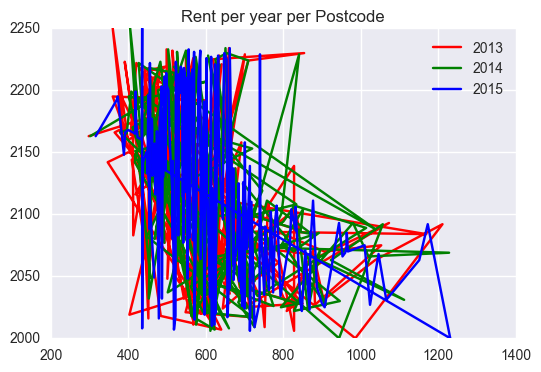

In [12]:
import matplotlib.pyplot
(fig, ax) = matplotlib.pyplot.subplots()
ax.plot(Rent_vs_Crime.Rent_2013,Rent_vs_Crime['Postcode'], color='r', label='2013')
ax.plot(Rent_vs_Crime.Rent_2014,Rent_vs_Crime['Postcode'], color='g', label='2014')
ax.plot(Rent_vs_Crime.Rent_2015,Rent_vs_Crime['Postcode'], color='b', label='2015')
ax.legend(loc='best')
ax.set_title("Rent per year per Postcode")

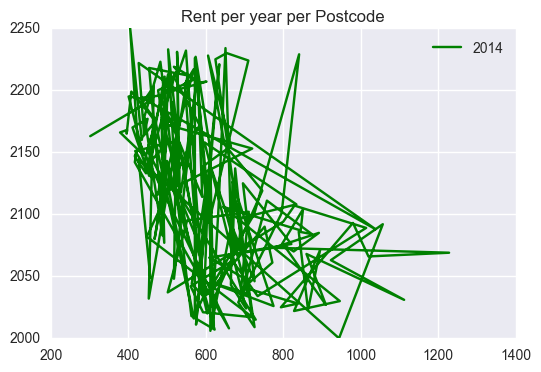

In [13]:
import matplotlib.pyplot
(fig, ax) = matplotlib.pyplot.subplots()
ax.plot(Rent_vs_Crime.Rent_2014,Rent_vs_Crime['Postcode'], color='g', label='2014')
ax.legend(loc='best')
ax.set_title("Rent per year per Postcode")

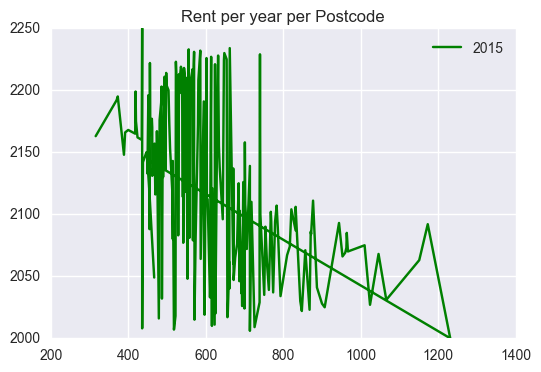

In [14]:
import matplotlib.pyplot
(fig, ax) = matplotlib.pyplot.subplots()
ax.plot(Rent_vs_Crime.Rent_2015,Rent_vs_Crime['Postcode'], color='g', label='2015')
ax.legend(loc='best')
ax.set_title("Rent per year per Postcode")

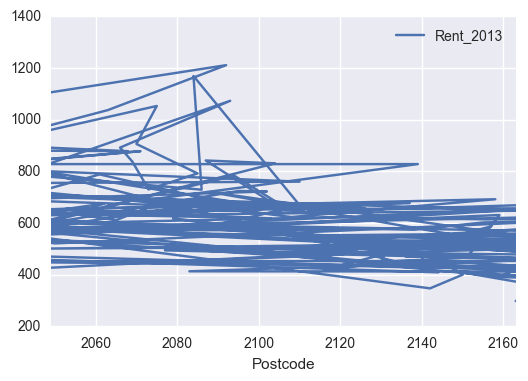

In [15]:
Rent_vs_Crime.plot(x='Postcode', y='Rent_2013')

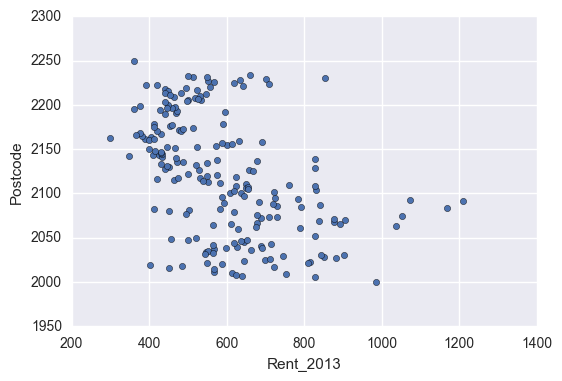

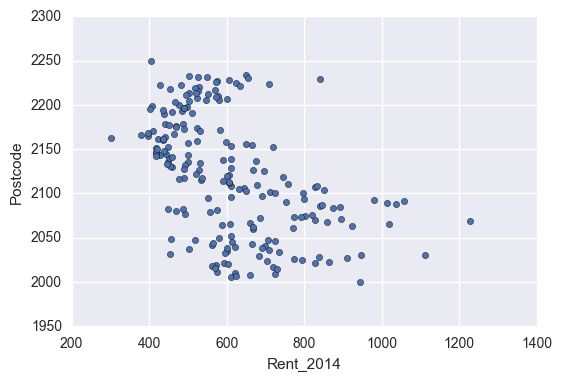

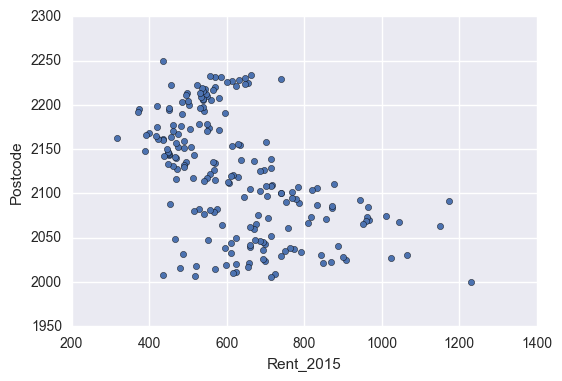

In [16]:
Rent_vs_Crime.plot.scatter(x='Rent_2013', y='Postcode')
Rent_vs_Crime.plot.scatter(x='Rent_2014', y='Postcode')
Rent_vs_Crime.plot.scatter(x='Rent_2015', y='Postcode')

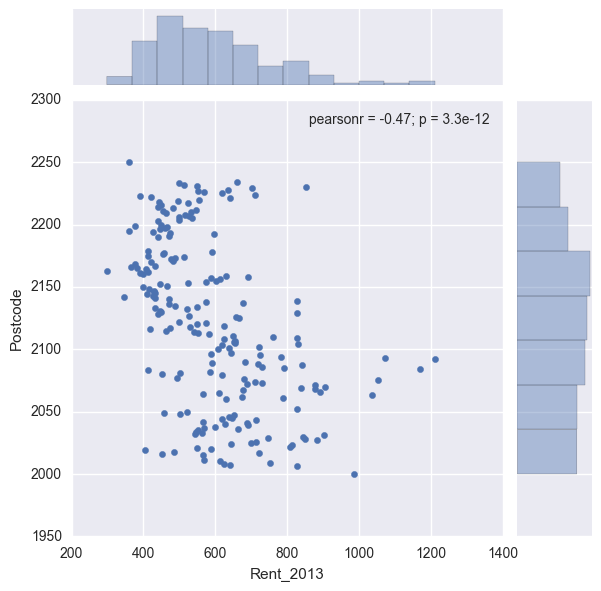

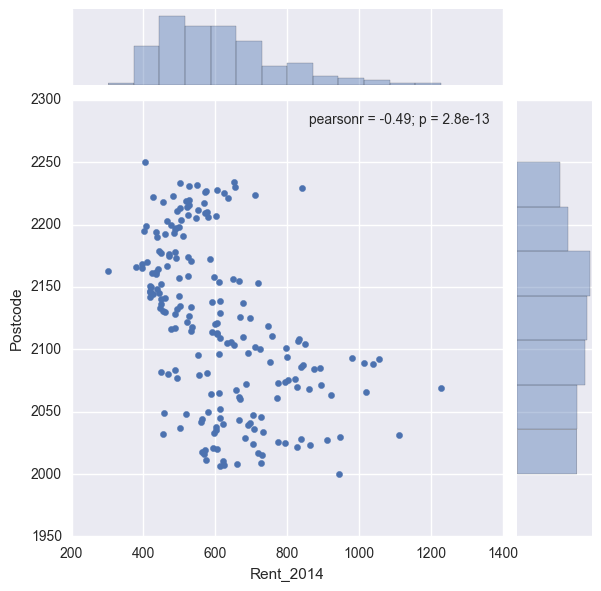

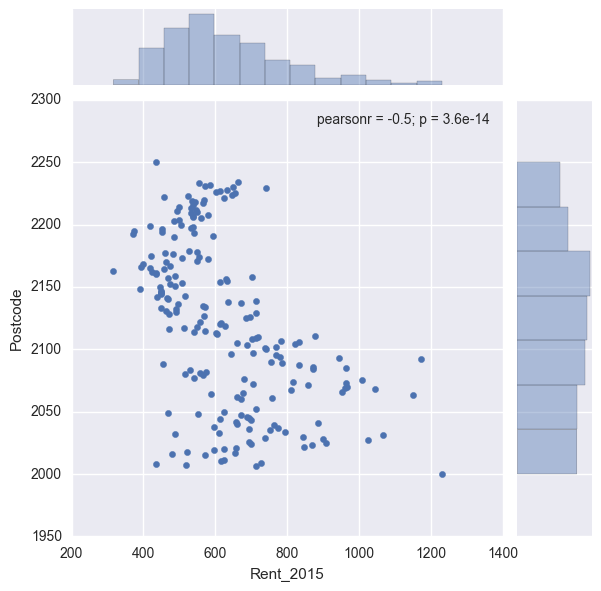

In [17]:
seaborn.jointplot(x='Rent_2013', y='Postcode', data=Rent_vs_Crime)
seaborn.jointplot(x='Rent_2014', y='Postcode', data=Rent_vs_Crime)
seaborn.jointplot(x='Rent_2015', y='Postcode', data=Rent_vs_Crime)

In [18]:
X1 = Rent_vs_Crime[['Crime_2015_Robbery','Crime_2015_Sexual_offences', 'Crime_2015_Theft', 'Crime_2015_Transport_regulatory_offences','Rent_2015']]
y1 = Rent_vs_Crime.Postcode

In [19]:
dtc = sklearn.tree.DecisionTreeRegressor(max_depth=10)
dtc.fit(X1, y1)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [20]:
try:
 from StringIO import StringIO
except ImportError:
 from io import StringIO
import sklearn.tree
import IPython.display
import pydot
File_obj = StringIO()
sklearn.tree.export_graphviz(dtc, out_file=File_obj, feature_names=['Crime_2015_Robbery',
       'Crime_2015_Sexual_offences', 'Crime_2015_Theft',
       'Crime_2015_Transport_regulatory_offences','Rent_2015'])

In [21]:
print(File_obj.getvalue())

digraph Tree {
node [shape=box] ;
0 [label="Rent_2015 <= 655.0\nmse = 4489.5709\nsamples = 199\nvalue = 2119.8693"] ;
1 [label="Crime_2015_Transport_regulatory_offences <= 129.0\nmse = 3900.2643\nsamples = 124\nvalue = 2148.1613"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Crime_2015_Transport_regulatory_offences <= 1.5\nmse = 3545.5448\nsamples = 66\nvalue = 2128.5909"] ;
1 -> 2 ;
3 [label="Rent_2015 <= 640.5\nmse = 1228.8878\nsamples = 28\nvalue = 2170.4286"] ;
2 -> 3 ;
4 [label="Crime_2015_Theft <= 38.0\nmse = 1081.1967\nsamples = 26\nvalue = 2166.2692"] ;
3 -> 4 ;
5 [label="mse = 0.0\nsamples = 1\nvalue = 2082.0"] ;
4 -> 5 ;
6 [label="Rent_2015 <= 497.0\nmse = 829.0304\nsamples = 25\nvalue = 2169.64"] ;
4 -> 6 ;
7 [label="Crime_2015_Robbery <= 6.5\nmse = 250.49\nsamples = 10\nvalue = 2153.1"] ;
6 -> 7 ;
8 [label="Crime_2015_Theft <= 92.0\nmse = 214.8594\nsamples = 8\nvalue = 2148.875"] ;
7 -> 8 ;
9 [label="Crime_2015_Robbery <= 0.5\nmse = 64.8889\nsam

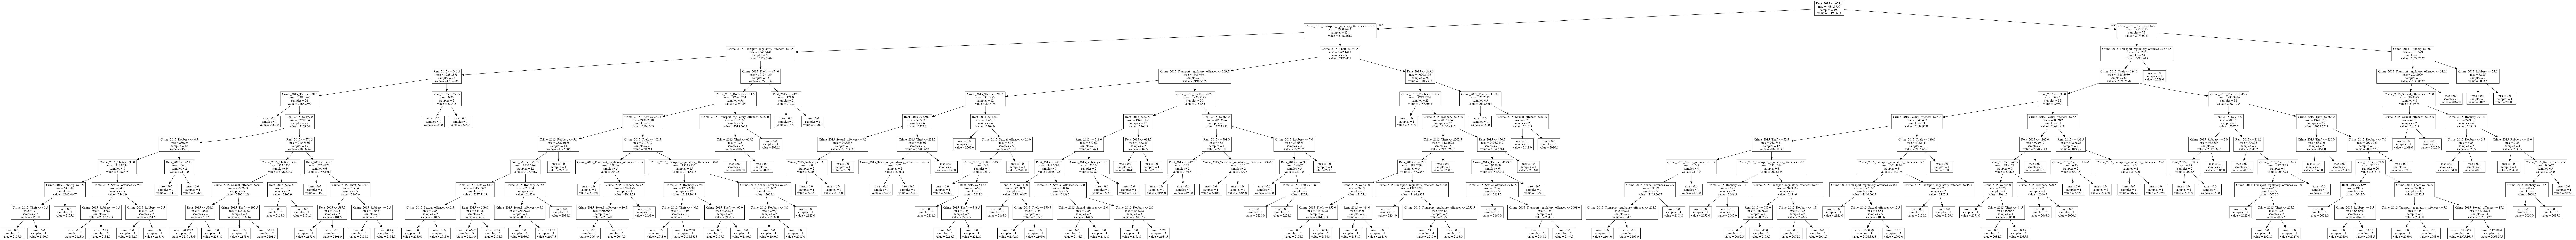

In [22]:
Graph = pydot.graph_from_dot_data(File_obj.getvalue())
IPython.display.Image(Graph.create_png())

In [23]:
dtcC = sklearn.tree.DecisionTreeClassifier(max_depth=5, criterion='entropy')
dtcC.fit(X1, y1)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [24]:
try:
 from StringIO import StringIO
except ImportError:
 from io import StringIO
import sklearn.tree
import IPython.display
import pydot
File_obj = StringIO()
sklearn.tree.export_graphviz(dtcC, out_file=File_obj, feature_names=['Crime_2015_Robbery',
       'Crime_2015_Sexual_offences', 'Crime_2015_Theft',
       'Crime_2015_Transport_regulatory_offences','Rent_2015'])

In [25]:
print(File_obj.getvalue())

digraph Tree {
node [shape=box] ;
0 [label="Rent_2015 <= 595.5\nentropy = 7.6366\nsamples = 199\nvalue = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1]"] ;
1 [label="Crime_2015_Theft <= 426.5\nentropy = 6.6294\nsamples = 99\nvalue = [0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1\

In [26]:
try:
 from StringIO import StringIO
except ImportError:
 from io import StringIO
import sklearn.tree
import IPython.display
import pydot
File_obj = StringIO()
sklearn.tree.export_graphviz(dtcC, out_file=File_obj, feature_names=['Crime_2015_Robbery',
       'Crime_2015_Sexual_offences', 'Crime_2015_Theft',
       'Crime_2015_Transport_regulatory_offences','Rent_2015'])

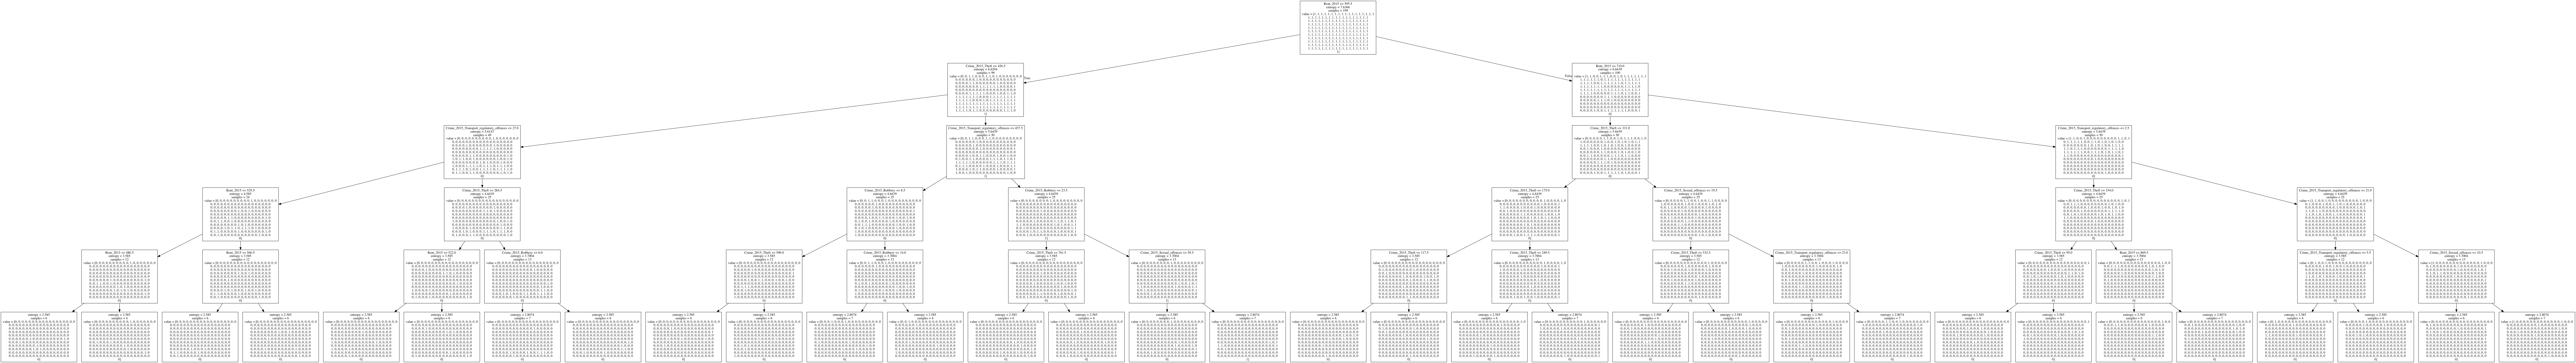

In [27]:
Graph = pydot.graph_from_dot_data(File_obj.getvalue())
IPython.display.Image(Graph.create_png())

In [30]:
X1 = Rent_vs_Crime[['Crime_2015_Robbery','Crime_2015_Sexual_offences', 'Crime_2015_Theft', 'Crime_2015_Transport_regulatory_offences','Rent_2015']]
import sklearn.grid_search
    brute_force = sklearn.grid_search.(
    sklearn.tree.DecisionTreeClassifier(),
    param_grid = {
        'max_depth': [1,2,3,4,5],
        'criterion': ['gini', 'entropy']
    },
    cv=10
    )
brute_force.fit(X1, y1)

ValueError: Found array with 0 sample(s) (shape=(0, 5)) while a minimum of 1 is required.